In [13]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [14]:
# The true value of the action selections
# 10 arms, mean of 0, variance of 1
true_action_values = np.random.normal(0, 1, 10)

#print(true_action_values)

In [15]:
# Returns the index of the strongest arm when given the value estimations
def strongest_arm(sample_average_action_estimate):
    
    # Starts off with first arm being the strongest
    curr_strongest = 0
    
    # Stores current index
    curr_index = 0
    
    # Loops through estimated value of all the arms
    for arm in sample_average_action_estimate:
        # If estimated value is larger than current largest, make it the new largest
        if arm > sample_average_action_estimate[curr_strongest]:
            curr_strongest = curr_index
            
        # Increments index of current arm
        curr_index = curr_index + 1
        
    # Return the index of the strongest arm
    return curr_strongest
            
    
    
    

In [16]:
# Returns the index of the strongest arm when given the actual values
def actual_strongest_arm_value(true_action_values):
    
    # Starts off with first arm being the strongest
    curr_strongest = 0
    
    
    # Stores current index
    curr_index = 0
    
    # Loops through actual value of all the arms
    for arm in true_action_values:
        # If value is larger than current largest, make it the new largest
        if arm > true_action_values[curr_strongest]:
            curr_strongest = curr_index
            
        # Increments index of current arm
        curr_index = curr_index + 1
        
    # Return the value of the strongest arm
    # return true_action_values[curr_strongest]

    # Return the index of the strongest arm
    return curr_strongest

3.

In [17]:
def e_greedy_policy(rate_of_exploration, time_horizon, true_action_values):
    true_action_values = np.random.normal(0, 1, 10)
    
    # Initial action-value estimates of 0 for all 10 arms
    sample_average_action_estimate = np.zeros(10)
    
    # We will take sum of rewards and divide by amount of occurences to get the sample average action estimate
    sum_of_rewards = np.zeros(10)
    number_of_occurences = np.zeros(10)
    
    # For storing the reward at each time step
    total_reward = []
    
    # For storing how optimal the reward is at each time step
    total_optimal = []
    
    # Stores the index of the largest value
    best_value = actual_strongest_arm_value(true_action_values)
    
    # For keeping track of current time step
    curr_index = 0
    
    #print(true_action_values)
    
    # Runs for 1000 time steps
    while(curr_index < time_horizon):
    
        # Gives a random number between 0 and 1. If less than rate of exploration, we will explore
        if np.random.rand() < rate_of_exploration:
            # We will choose 1 of the actions from random
            current_action = np.random.choice(10)

            # The current action value is mean of true action value and variance of 1
            curr_action_value = np.random.normal(true_action_values[current_action], 1)

            # Add the current value to the total value for that action
            sum_of_rewards[current_action] = sum_of_rewards[current_action] + curr_action_value
            # Increment the amount of occurences of that action by 1
            number_of_occurences[current_action] = number_of_occurences[current_action] + 1;

            # Update the estimated mean for the action
            sample_average_action_estimate[current_action] = sum_of_rewards[current_action] / number_of_occurences[current_action]

            # Add the value of current action to list containing all values
            total_reward.append(curr_action_value)
            
            # Gets percentage optimal by dividing the value of the current action by the value of the best action
            #curr_optimal = curr_action_value / best_value
            
            # If we picked the strongest arm
            if current_action == best_value:
                # Add a 1
                total_optimal.append(1)
            # If we did not pick the strongest arm
            else:
                # Add a 0
                total_optimal.append(0)
                
            
            # Add the percentage optimal of the current action to list containing all percentages
            #total_optimal.append(curr_optimal)
            
            #print("curr_action_value: ", curr_action_value)
            #print("best_value: ", best_value)
            #print("curr_optimal: ", curr_optimal)
    

        # If greater than rate of exploration, we will exploit
        else:
            # We will choose the strongest arm for the action
            current_action = strongest_arm(sample_average_action_estimate)

            # The current action value is mean of true action value and variance of 1
            curr_action_value = np.random.normal(true_action_values[current_action], 1)

            # Add the current value to the total value for that action
            sum_of_rewards[current_action] = sum_of_rewards[current_action] + curr_action_value
            # Increment the amount of occurences of that action by 1
            number_of_occurences[current_action] = number_of_occurences[current_action] + 1;

            # Update the estimated mean for the action
            sample_average_action_estimate[current_action] = sum_of_rewards[current_action] / number_of_occurences[current_action]

            # Add the value of current action to list containing all values
            total_reward.append(curr_action_value)
            
            # If we picked the strongest arm
            if current_action == best_value:
                # Add a 1
                total_optimal.append(1)
            # If we did not pick the strongest arm
            else:
                # Add a 0
                total_optimal.append(0)
            
            # Gets percentage optimal by dividing the value of the current action by the value of the best action
            #curr_optimal = curr_action_value / best_value
            
            # Add the percentage optimal of the current action to list containing all percentages
            #total_optimal.append(curr_optimal)
            
            #print("curr_action_value: ", curr_action_value)
            #print("best_value: ", best_value)
            #print("curr_optimal: ", curr_optimal)
            
        # Increment current index
        curr_index = curr_index + 1
        
    
    # Return list of rewards at each time step
    return total_reward, total_optimal


    
    
   
    
    
    

In [18]:
curr_index = 0
total_instances = 2000

# Stores the reward of 1000 time steps for 1 testbed
rewards_curr_instance = []
optimal_curr_instance = []

# Stores the reward of 1000 time steps for 2000 testbeds
rewards_all_instances = []
optimal_all_instances = []

# Stores the sum of all 2000 testbeds for each time instance
rewards_total = []
optimal_total = []

# Stores the average reward for 1000 time steps from 2000 testbeds
rewards_average_q3 = []
optimal_average_q3 = []

# Running the testbed 2000 times
while(curr_index < total_instances):
    rewards_curr_instance, optimal_curr_instance = e_greedy_policy(0, 1000, true_action_values)
    
    rewards_all_instances.append(rewards_curr_instance)
    optimal_all_instances.append(optimal_curr_instance)
    
    
    # Increment the current index by 1
    curr_index = curr_index + 1
    
    
# Set rewards total to 0 for all 1000 time instances
for i in range(1000):
    rewards_total.append(0)
    optimal_total.append(0)
    
    
# 2000 testbeds
for i in range(len(rewards_all_instances)):
    # Each with 1000 time steps
    for k in range(1000):
        # Get the reward at current time step
        rewards_total[k] = rewards_total[k] + rewards_all_instances[i][k]
        optimal_total[k] = optimal_total[k] + optimal_all_instances[i][k]

    
# Set rewards average to 0 for all 1000 time instances
for i in range(1000):
    rewards_average_q3.append(0)
    optimal_average_q3.append(0)
    

# Divde rewards total by 2000 as there are 2000 testbeds
for i in range(1000):
    rewards_average_q3[i] = rewards_total[i] / 2000
    optimal_average_q3[i] = optimal_total[i] / 2000

        
    
    
    


In [19]:
curr_index = 0
total_instances = 2000

# Stores the reward of 1000 time steps for 1 testbed
rewards_curr_instance = []
optimal_curr_instance = []

# Stores the reward of 1000 time steps for 2000 testbeds
rewards_all_instances = []
optimal_all_instances = []

# Stores the sum of all 2000 testbeds for each time instance
rewards_total = []
optimal_total = []

# Stores the average reward for 1000 time steps from 2000 testbeds
rewards_average2_q3 = []
optimal_average2_q3 = []

# Running the testbed 2000 times
while(curr_index < total_instances):
    rewards_curr_instance, optimal_curr_instance = e_greedy_policy(0.01, 1000, true_action_values)
    
    rewards_all_instances.append(rewards_curr_instance)
    optimal_all_instances.append(optimal_curr_instance)
    
    
    # Increment the current index by 1
    curr_index = curr_index + 1
    
    
# Set rewards total to 0 for all 1000 time instances
for i in range(1000):
    rewards_total.append(0)
    optimal_total.append(0)
    
    
# 2000 testbeds
for i in range(len(rewards_all_instances)):
    # Each with 1000 time steps
    for k in range(1000):
        # Get the reward at current time step
        rewards_total[k] = rewards_total[k] + rewards_all_instances[i][k]
        optimal_total[k] = optimal_total[k] + optimal_all_instances[i][k]

    
# Set rewards average to 0 for all 1000 time instances
for i in range(1000):
    rewards_average2_q3.append(0)
    optimal_average2_q3.append(0)
    

# Divde rewards total by 2000 as there are 2000 testbeds
for i in range(1000):
    rewards_average2_q3[i] = rewards_total[i] / 2000
    optimal_average2_q3[i] = optimal_total[i] / 2000

        
    
    
    


        
    
    
    


In [20]:
curr_index = 0
total_instances = 2000

# Stores the reward of 1000 time steps for 1 testbed
rewards_curr_instance = []
optimal_curr_instance = []

# Stores the reward of 1000 time steps for 2000 testbeds
rewards_all_instances = []
optimal_all_instances = []

# Stores the sum of all 2000 testbeds for each time instance
rewards_total = []
optimal_total = []

# Stores the average reward for 1000 time steps from 2000 testbeds
rewards_average3_q3 = []
optimal_average3_q3 = []

# Running the testbed 2000 times
while(curr_index < total_instances):
    rewards_curr_instance, optimal_curr_instance = e_greedy_policy(0.1, 1000, true_action_values)
    
    rewards_all_instances.append(rewards_curr_instance)
    optimal_all_instances.append(optimal_curr_instance)
    
    
    # Increment the current index by 1
    curr_index = curr_index + 1
    
    
# Set rewards total to 0 for all 1000 time instances
for i in range(1000):
    rewards_total.append(0)
    optimal_total.append(0)
    
    
# 2000 testbeds
for i in range(len(rewards_all_instances)):
    # Each with 1000 time steps
    for k in range(1000):
        # Get the reward at current time step
        rewards_total[k] = rewards_total[k] + rewards_all_instances[i][k]
        optimal_total[k] = optimal_total[k] + optimal_all_instances[i][k]

    
# Set rewards average to 0 for all 1000 time instances
for i in range(1000):
    rewards_average3_q3.append(0)
    optimal_average3_q3.append(0)
    

# Divde rewards total by 2000 as there are 2000 testbeds
for i in range(1000):
    rewards_average3_q3[i] = rewards_total[i] / 2000
    optimal_average3_q3[i] = optimal_total[i] / 2000

        
    
    
    


a.

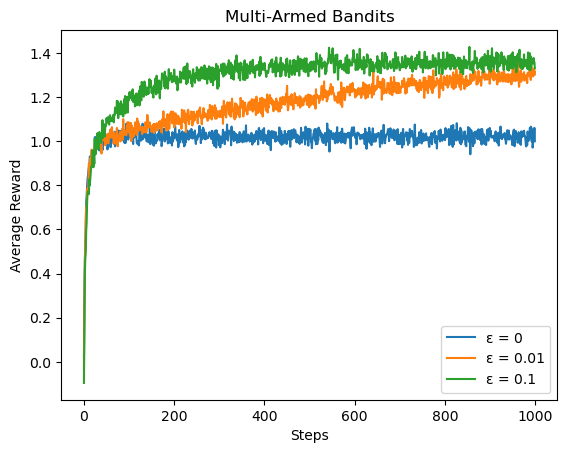

In [21]:
plt.xlabel("Steps")
plt.ylabel("Average Reward")
plt.title("Multi-Armed Bandits")

plt.plot(rewards_average_q3, label="ε = 0")
plt.plot(rewards_average2_q3, label="ε = 0.01")
plt.plot(rewards_average3_q3, label="ε = 0.1")


plt.legend()
plt.show()

For an arm that was purely greedy, it would perform the best in the very short term but always had an average reward of 1. For an arm that was greedy 90% of the time, it performed the best towards the beginning with an average reward of around 1.2 and also the best towards the end with an average reward of around 1.4. An arm that was greedy 99% of the time started slow, but over time had the average reward grow much more rapidly than for 90% greedy. My assumption is that if we did this for 2000 time steps, 99% greedy would perform the best.

b.

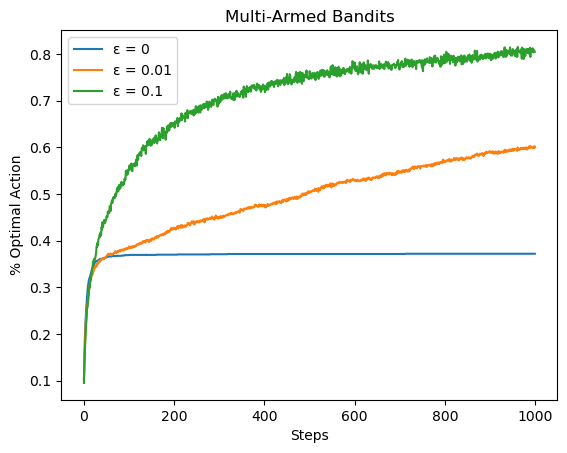

In [22]:
plt.xlabel("Steps")
plt.ylabel("% Optimal Action")
plt.title("Multi-Armed Bandits")

plt.plot(optimal_average_q3, label="ε = 0")
plt.plot(optimal_average2_q3, label="ε = 0.01")
plt.plot(optimal_average3_q3, label="ε = 0.1")


plt.legend()
plt.show()

Purely greedy chose the optimal arm 35% of the time throughout. 99% greedy also started around 35% optimal and grew at a steady rate of 1% optimal per every 40 time steps. For 90% greedy, it skyrocketed at the beginning, being around 63% optimal at time step 200. Towards the end, 90% greedy is very much in the lead at around 80% optimal, but 99% greedy is growing at a faster rate.

4.

In [23]:
def optimistic_initial_values(rate_of_exploration, time_horizon, true_action_values, initial_estimate, step_size):
    true_action_values = np.random.normal(0, 1, 10)
    
    # Initial action-value estimates of 0 for all 10 arms
    sample_average_action_estimate = np.zeros(10)
    
    # Loops through, changing all of the estimates to the intial estimate
    for i in range(len(sample_average_action_estimate)):
        sample_average_action_estimate[i] = initial_estimate
    
    # We will take sum of rewards and divide by amount of occurences to get the sample average action estimate
    sum_of_rewards = np.zeros(10)
    number_of_occurences = np.zeros(10)
    
    # For storing the reward at each time step
    total_reward = []
    
    # For storing how optimal the reward is at each time step
    total_optimal = []
    
    # Stores the index of the largest value
    best_value = actual_strongest_arm_value(true_action_values)
    
    # For keeping track of current time step
    curr_index = 0
    
    #print(true_action_values)
    
    # Runs for 1000 time steps
    while(curr_index < time_horizon):
    
        # Gives a random number between 0 and 1. If less than rate of exploration, we will explore
        if np.random.rand() < rate_of_exploration:
            # We will choose 1 of the actions from random
            current_action = np.random.choice(10)

            # The current action value is mean of true action value and variance of 1
            curr_action_value = np.random.normal(true_action_values[current_action], 1)

            # Add the current value to the total value for that action
            #sum_of_rewards[current_action] = sum_of_rewards[current_action] + curr_action_value
            # Increment the amount of occurences of that action by 1
            #number_of_occurences[current_action] = number_of_occurences[current_action] + 1;

            # Update the estimated mean for the action
            #sample_average_action_estimate[current_action] = sum_of_rewards[current_action] / number_of_occurences[current_action]
            
            # Update the estimated mean again using step size
            sample_average_action_estimate[current_action] = sample_average_action_estimate[current_action] + (step_size * (curr_action_value - sample_average_action_estimate[current_action]))

            # Add the value of current action to list containing all values
            total_reward.append(curr_action_value)
            
            # If we picked the strongest arm
            if current_action == best_value:
                # Add a 1
                total_optimal.append(1)
            # If we did not pick the strongest arm
            else:
                # Add a 0
                total_optimal.append(0)
            
            # Gets percentage optimal by dividing the value of the current action by the value of the best action
            #curr_optimal = curr_action_value / best_value
            
            # Add the percentage optimal of the current action to list containing all percentages
            #total_optimal.append(curr_optimal)
            
            
            
            
            
            #print("curr_action_value: ", curr_action_value)
            #print("best_value: ", best_value)
            #print("curr_optimal: ", curr_optimal)
    

        # If greater than rate of exploration, we will exploit
        else:
            # We will choose the strongest arm for the action
            current_action = strongest_arm(sample_average_action_estimate)

            # The current action value is mean of true action value and variance of 1
            curr_action_value = np.random.normal(true_action_values[current_action], 1)

            # Add the current value to the total value for that action
            #sum_of_rewards[current_action] = sum_of_rewards[current_action] + curr_action_value
            # Increment the amount of occurences of that action by 1
            #number_of_occurences[current_action] = number_of_occurences[current_action] + 1;

            # Update the estimated mean for the action
            #sample_average_action_estimate[current_action] = sum_of_rewards[current_action] / number_of_occurences[current_action]
            
             # Update the estimated mean again using step size
            sample_average_action_estimate[current_action] = sample_average_action_estimate[current_action] + (step_size * (curr_action_value - sample_average_action_estimate[current_action]))

            # Add the value of current action to list containing all values
            total_reward.append(curr_action_value)
            
            # If we picked the strongest arm
            if current_action == best_value:
                # Add a 1
                total_optimal.append(1)
            # If we did not pick the strongest arm
            else:
                # Add a 0
                total_optimal.append(0)
            
            # Gets percentage optimal by dividing the value of the current action by the value of the best action
            #curr_optimal = curr_action_value / best_value
            
            # Add the percentage optimal of the current action to list containing all percentages
            #total_optimal.append(curr_optimal)
            
            #print("curr_action_value: ", curr_action_value)
            #print("best_value: ", best_value)
            #print("curr_optimal: ", curr_optimal)
            
        # Increment current index
        curr_index = curr_index + 1
        
    
    # Return list of rewards at each time step
    return total_reward, total_optimal


    
    

In [24]:
curr_index = 0
total_instances = 2000

# Stores the reward of 1000 time steps for 1 testbed
rewards_curr_instance = []
optimal_curr_instance = []

# Stores the reward of 1000 time steps for 2000 testbeds
rewards_all_instances = []
optimal_all_instances = []

# Stores the sum of all 2000 testbeds for each time instance
rewards_total = []
optimal_total = []

# Stores the average reward for 1000 time steps from 2000 testbeds
rewards_average_q4 = []
optimal_average_q4 = []

# Running the testbed 2000 times
while(curr_index < total_instances):
    rewards_curr_instance, optimal_curr_instance = optimistic_initial_values(0, 1000, true_action_values, 5, 0.1)
    
    rewards_all_instances.append(rewards_curr_instance)
    optimal_all_instances.append(optimal_curr_instance)
    
    
    # Increment the current index by 1
    curr_index = curr_index + 1
    
    
# Set rewards total to 0 for all 1000 time instances
for i in range(1000):
    rewards_total.append(0)
    optimal_total.append(0)
    
    
# 2000 testbeds
for i in range(len(rewards_all_instances)):
    # Each with 1000 time steps
    for k in range(1000):
        # Get the reward at current time step
        rewards_total[k] = rewards_total[k] + rewards_all_instances[i][k]
        optimal_total[k] = optimal_total[k] + optimal_all_instances[i][k]

    
# Set rewards average to 0 for all 1000 time instances
for i in range(1000):
    rewards_average_q4.append(0)
    optimal_average_q4.append(0)
    

# Divde rewards total by 2000 as there are 2000 testbeds
for i in range(1000):
    rewards_average_q4[i] = rewards_total[i] / 2000
    optimal_average_q4[i] = optimal_total[i] / 2000

        
    
    
    


In [25]:
curr_index = 0
total_instances = 2000

# Stores the reward of 1000 time steps for 1 testbed
rewards_curr_instance = []
optimal_curr_instance = []

# Stores the reward of 1000 time steps for 2000 testbeds
rewards_all_instances = []
optimal_all_instances = []

# Stores the sum of all 2000 testbeds for each time instance
rewards_total = []
optimal_total = []

# Stores the average reward for 1000 time steps from 2000 testbeds
rewards_average2_q4 = []
optimal_average2_q4 = []

# Running the testbed 2000 times
while(curr_index < total_instances):
    rewards_curr_instance, optimal_curr_instance = optimistic_initial_values(0.1, 1000, true_action_values, 0, 0.1)
    
    rewards_all_instances.append(rewards_curr_instance)
    optimal_all_instances.append(optimal_curr_instance)
    
    
    # Increment the current index by 1
    curr_index = curr_index + 1
    
    
# Set rewards total to 0 for all 1000 time instances
for i in range(1000):
    rewards_total.append(0)
    optimal_total.append(0)
    
    
# 2000 testbeds
for i in range(len(rewards_all_instances)):
    # Each with 1000 time steps
    for k in range(1000):
        # Get the reward at current time step
        rewards_total[k] = rewards_total[k] + rewards_all_instances[i][k]
        optimal_total[k] = optimal_total[k] + optimal_all_instances[i][k]

    
# Set rewards average to 0 for all 1000 time instances
for i in range(1000):
    rewards_average2_q4.append(0)
    optimal_average2_q4.append(0)
    

# Divde rewards total by 2000 as there are 2000 testbeds
for i in range(1000):
    rewards_average2_q4[i] = rewards_total[i] / 2000
    optimal_average2_q4[i] = optimal_total[i] / 2000

        
    
    
    

a. 

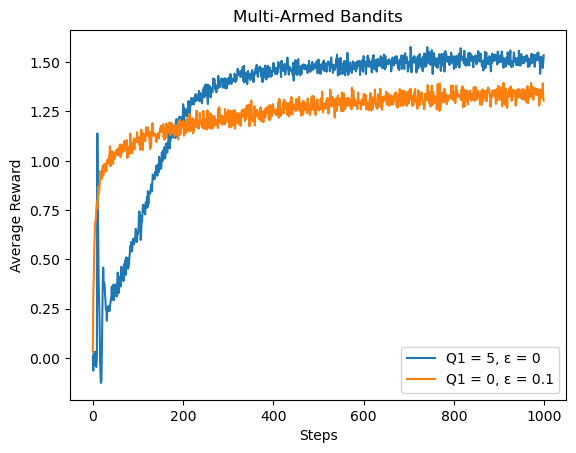

In [26]:
plt.xlabel("Steps")
plt.ylabel("Average Reward")
plt.title("Multi-Armed Bandits")

plt.plot(rewards_average_q4, label="Q1 = 5, ε = 0")
plt.plot(rewards_average2_q4, label="Q1 = 0, ε = 0.1")


plt.legend()
plt.show()

At time step 50, the average reward is around 0.3 for blue and a little over 1 for orange. By time step 200, they are both tied at around 1.1. By the end, the average reward for blue is sighlty higher at 1.5 compared to orange at around 1.25. An initial estimated value of 5 that is purely greedy is trying a lot of different options in the beginning as it is very strongly overstimating the actual mean rewards. Trying out all the different arms in the very beginning is good for picking the best arm for the long term. By time step 200, it will perform better than 90% greedy with intial estimates of 0.

b.

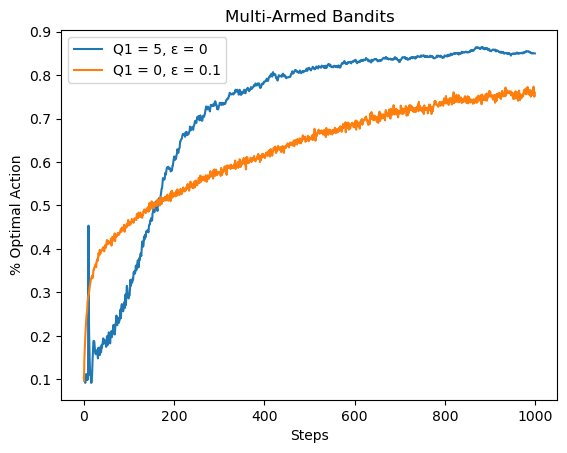

In [35]:
plt.xlabel("Steps")
plt.ylabel("% Optimal Action")
plt.title("Multi-Armed Bandits")

plt.plot(optimal_average_q4, label="Q1 = 5, ε = 0")
plt.plot(optimal_average2_q4, label="Q1 = 0, ε = 0.1")


plt.legend()
plt.show()

The optimisitc intitial values once again are going through all of the arms at the start, making the optimal performance start slow. By time step 250, it has skyrocketed to 70% optimal compared to a little over 50% optimal for 90% greedy. Optimistic intial values will coast the rest of the way, with 85% optimal at time step 1000. 90% greedy will be on the catch up, growing more rapidly, but only at around 70% optimal at time step 1000.

5.

In [28]:
def ucb_action_selection(sample_average_action_estimate, degree_of_exploration, time_horizon, number_of_occurences):
    # Stores index of next biggest arm
    next_best_arm_index = 0
    
    # Stores the potential of the largest arm
    arg_max = 0
    
    # Stores the potential of the current arm
    curr_potential = 0
    
    # Loop through 10 arms
    for i in range(len(sample_average_action_estimate)):
        # If arm has not been selected
        if number_of_occurences[i] == 0:
            curr_potential = sample_average_action_estimate[i] + (degree_of_exploration * math.sqrt(math.log(time_horizon)))
            # If current arm is better than best arm
            if curr_potential > arg_max:
                # Best arm becomes current arm
                arg_max = curr_potential
                # Gets index of next best arm
                next_best_arm_index = i
        # If arm has been selected before, formula changes
        if number_of_occurences[i] != 0:
            curr_potential = sample_average_action_estimate[i] + (degree_of_exploration * math.sqrt(math.log(time_horizon)/number_of_occurences[i]))
            # If current arm is better than best arm
            if curr_potential > arg_max:
                # Best arm becomes current arm
                arg_max = curr_potential
                # Gets index of next best arm
                next_best_arm_index = i
    
    
    return next_best_arm_index
            
    
    

In [29]:
def ucb_policy(rate_of_exploration, time_horizon, true_action_values, degree_of_exploration):
    true_action_values = np.random.normal(0, 1, 10)
    
    
    # Initial action-value estimates of 0 for all 10 arms
    sample_average_action_estimate = np.zeros(10)
    
    # We will take sum of rewards and divide by amount of occurences to get the sample average action estimate
    sum_of_rewards = np.zeros(10)
    number_of_occurences = np.zeros(10)
    
    # For storing the reward at each time step
    total_reward = []
    
    # For storing how optimal the reward is at each time step
    total_optimal = []
    
    # Stores the index of the largest value
    best_value = actual_strongest_arm_value(true_action_values)
    
    # For keeping track of current time step
    curr_index = 0
    
    #print(true_action_values)
    
    # Runs for 1000 time steps
    while(curr_index < time_horizon):
    
        # Gives a random number between 0 and 1. If less than rate of exploration, we will explore
        if np.random.rand() < rate_of_exploration:
            # We will choose 1 of the actions from random
            #current_action = np.random.choice(10)
            

            # The current action value is mean of true action value and variance of 1
            curr_action_value = np.random.normal(true_action_values[current_action], 1)

            # Add the current value to the total value for that action
            sum_of_rewards[current_action] = sum_of_rewards[current_action] + curr_action_value
            # Increment the amount of occurences of that action by 1
            number_of_occurences[current_action] = number_of_occurences[current_action] + 1;

            # Update the estimated mean for the action
            sample_average_action_estimate[current_action] = sum_of_rewards[current_action] / number_of_occurences[current_action]

            # Add the value of current action to list containing all values
            total_reward.append(curr_action_value)
            
            # If we picked the strongest arm
            if current_action == best_value:
                # Add a 1
                total_optimal.append(1)
            # If we did not pick the strongest arm
            else:
                # Add a 0
                total_optimal.append(0)
            
            # Gets percentage optimal by dividing the value of the current action by the value of the best action
            #curr_optimal = curr_action_value / best_value
            
            # Add the percentage optimal of the current action to list containing all percentages
            #total_optimal.append(curr_optimal)
            
            
            
            #print("curr_action_value: ", curr_action_value)
            #print("best_value: ", best_value)
            #print("curr_optimal: ", curr_optimal)
    

        # If greater than rate of exploration, we will exploit
        else:
            
            # We will use a function to get the best non-greedy action
            current_action = ucb_action_selection(sample_average_action_estimate, degree_of_exploration, time_horizon, number_of_occurences)
            

            # The current action value is mean of true action value and variance of 1
            curr_action_value = np.random.normal(true_action_values[current_action], 1)
            
            # Add the current value to the total value for that action
            sum_of_rewards[current_action] = sum_of_rewards[current_action] + curr_action_value
            # Increment the amount of occurences of that action by 1
            number_of_occurences[current_action] = number_of_occurences[current_action] + 1;

            # Update the estimated mean for the action
            sample_average_action_estimate[current_action] = sum_of_rewards[current_action] / number_of_occurences[current_action]

            # Add the value of current action to list containing all values
            total_reward.append(curr_action_value)
            
            # If we picked the strongest arm
            if current_action == best_value:
                # Add a 1
                total_optimal.append(1)
            # If we did not pick the strongest arm
            else:
                # Add a 0
                total_optimal.append(0)
            
            # Gets percentage optimal by dividing the value of the current action by the value of the best action
            #curr_optimal = curr_action_value / best_value
            
            # Add the percentage optimal of the current action to list containing all percentages
            #total_optimal.append(curr_optimal)
            
            #print("curr_action_value: ", curr_action_value)
            #print("best_value: ", best_value)
            #print("curr_optimal: ", curr_optimal)
            
        # Increment current index
        curr_index = curr_index + 1
        
    
    # Return list of rewards at each time step
    return total_reward, total_optimal


    
    
   
    
    
    

In [30]:
curr_index = 0
total_instances = 2000

# Stores the reward of 1000 time steps for 1 testbed
rewards_curr_instance = []
optimal_curr_instance = []

# Stores the reward of 1000 time steps for 2000 testbeds
rewards_all_instances = []
optimal_all_instances = []

# Stores the sum of all 2000 testbeds for each time instance
rewards_total = []
optimal_total = []

# Stores the average reward for 1000 time steps from 2000 testbeds
rewards_average_q5 = []
optimal_average_q5 = []

# Running the testbed 2000 times
while(curr_index < total_instances):
    rewards_curr_instance, optimal_curr_instance = ucb_policy(0, 1000, true_action_values, 2)
    rewards_all_instances.append(rewards_curr_instance)
    optimal_all_instances.append(optimal_curr_instance)
    
    
    # Increment the current index by 1
    curr_index = curr_index + 1
    
    
# Set rewards total to 0 for all 1000 time instances
for i in range(1000):
    rewards_total.append(0)
    optimal_total.append(0)
    
    
# 2000 testbeds
for i in range(len(rewards_all_instances)):
    # Each with 1000 time steps
    for k in range(1000):
        # Get the reward at current time step
        rewards_total[k] = rewards_total[k] + rewards_all_instances[i][k]
        optimal_total[k] = optimal_total[k] + optimal_all_instances[i][k]

    
# Set rewards average to 0 for all 1000 time instances
for i in range(1000):
    rewards_average_q5.append(0)
    optimal_average_q5.append(0)
    

# Divde rewards total by 2000 as there are 2000 testbeds
for i in range(1000):
    rewards_average_q5[i] = rewards_total[i] / 2000
    optimal_average_q5[i] = optimal_total[i] / 2000

        
    
    
    


a.

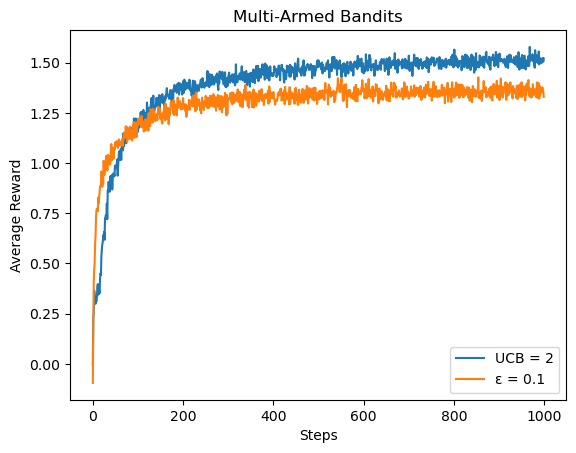

In [33]:
plt.xlabel("Steps")
plt.ylabel("Average Reward")
plt.title("Multi-Armed Bandits")

plt.plot(rewards_average_q5, label="UCB = 2")
plt.plot(rewards_average3_q3, label="ε = 0.1")


plt.legend()
plt.show()

UCB with degree of exploration of 2 starts a little bit slower than 90% greedy, but takes the lead at around time step 100. By time step 200, both methods are growing at a very slow rate. At time step 1000, UCB is at an average reward of 1.5 and 90% greedy is around 1.25 average reward.

b. 

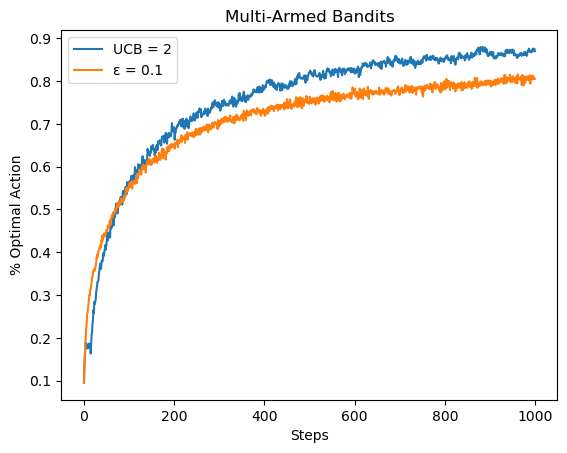

In [34]:
plt.xlabel("Steps")
plt.ylabel("% Optimal Action")
plt.title("Multi-Armed Bandits")

plt.plot(optimal_average_q5, label="UCB = 2")
plt.plot(optimal_average3_q3, label="ε = 0.1")


plt.legend()
plt.show()

Both UCB with a degree of exploration of 2 and 90% greedy perform similarly in terms of start point and growth rate. By time step 1000, UCB is at around 83% optimal and 90% greedy is around 73% optimal.